In [1]:
from model.core import run_simulation
from configs.example_dg8_nashir import get_config

cfg = get_config()
state, log = run_simulation(cfg, with_log=True)


In [2]:
from model.core import SimulationConfig, run_simulation

# --- Config: DG 10★ + Nashir + Combo Mastery ---
cfg = get_config()

state, log = run_simulation(cfg, with_log=True)

# --- Print per-round breakdown ---
print("DG 10★ + Nashir + Combo Mastery")
print("Round |    Basic |    Flame |   Breath |      Bolt |    Other |     Total")
print("----------------------------------------------------------------------------")
for row in log:
    total = row["basic"] + row["flame"] + row["breath"] + row["bolt"] + row["other"]
    print(
        f"{row['round']:5d} |"
        f"{row['basic']:8.0f} |"
        f"{row['flame']:8.0f} |"
        f"{row['breath']:8.0f} |"
        f"{row['bolt']:9.0f} |"
        f"{row['other']:8.0f} |"
        f"{total:9.0f}"
    )

# --- Totals ---
total_all = (
    state.dmg_basic
    + state.dmg_flame
    + state.dmg_breath
    + state.dmg_bolt
    + state.dmg_other
)

print("\nTotals over", cfg.rounds, "rounds:")
print(f" basic  = {state.dmg_basic:.0f}")
print(f" flame  = {state.dmg_flame:.0f}")
print(f" breath = {state.dmg_breath:.0f}")
print(f" bolt   = {state.dmg_bolt:.0f}")
print(f" other  = {state.dmg_other:.0f}")
print(f" total  = {total_all:.0f}")



DG 10★ + Nashir + Combo Mastery
Round |    Basic |    Flame |   Breath |      Bolt |    Other |     Total
----------------------------------------------------------------------------
    1 |   99981 |  955874 | 1420434 |   755964 |       0 |  3232253
    2 |  152145 | 1831484 |       0 |  1400045 |       0 |  3383675
    3 |  152145 | 1393679 | 2004174 |  7656403 |       0 | 11206402
    4 |  199093 | 2225509 |       0 |  1382910 |       0 |  3807511
    5 |  173880 | 1576098 | 2101464 |  1665137 |       0 |  5516579
    6 |  199962 | 2232805 |       0 |  8043457 |       0 | 10476224
    7 |  173880 | 1576098 | 2101464 |  1030127 |       0 |  4881569
    8 |  199962 | 2232805 |       0 |  1171240 |       0 |  3604008
    9 |  173880 | 1576098 | 2101464 |  8043457 |       0 | 11894899
   10 |  199962 | 2232806 |       0 |  1030127 |       0 |  3462894
   11 |  173880 | 1576098 | 2101464 |  1171240 |       0 |  5022682
   12 |  199962 | 2232806 |       0 |  6632324 |       0 |  9065092
 

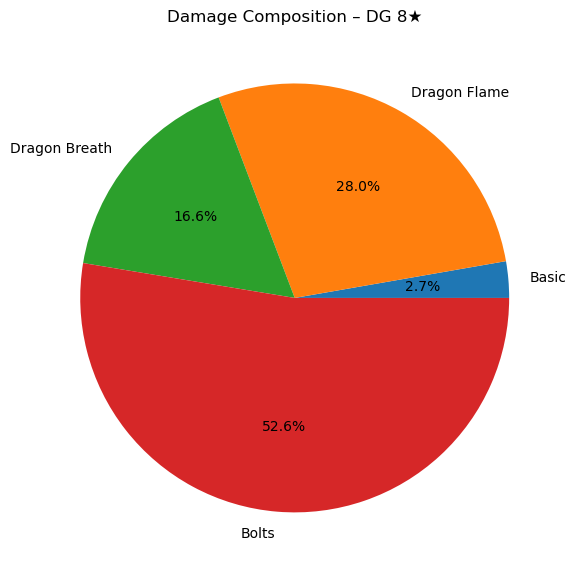

Damage composition (totals and %):
Basic        : 2,646,453.6  (  2.7%)
Dragon Flame : 27,027,162.0  ( 28.0%)
Dragon Breath: 16,033,392.0  ( 16.6%)
Bolts        : 50,721,152.6  ( 52.6%)


In [3]:
import matplotlib.pyplot as plt

# --- Aggregate totals from the simulation state ---
basic_total  = state.dmg_basic
flame_total  = state.dmg_flame
breath_total = state.dmg_breath
bolt_total   = state.dmg_bolt
other_total  = state.dmg_other

labels = ["Basic", "Dragon Flame", "Dragon Breath", "Bolts", "Other"]
values = [basic_total, flame_total, breath_total, bolt_total, other_total]

# Optionally filter out zero components so the pie is cleaner
labels_nonzero = []
values_nonzero = []
for lbl, val in zip(labels, values):
    if val > 0:
        labels_nonzero.append(lbl)
        values_nonzero.append(val)

# --- Pie chart ---
plt.figure(figsize=(6, 6))
plt.pie(
    values_nonzero,
    labels=labels_nonzero,
    autopct=lambda p: f"{p:.1f}%"
)
title_adv = f"{cfg.adventurer} {cfg.star}★" if hasattr(cfg, "adventurer") else "Adventurer"
plt.title(f"Damage Composition – {title_adv}")
plt.tight_layout()
plt.show()

total_damage = sum(values)
print("Damage composition (totals and %):")
for lbl, val in zip(labels, values):
    if val <= 0:
        continue
    pct = val / total_damage * 100
    print(f"{lbl:13s}: {val:,.1f}  ({pct:5.1f}%)")


In [ ]:
import pandas as pd
from model.core import SimulationConfig, run_simulation

rows = []

# Shared default multipliers
DEFAULTS = dict(
    base_global_skill_bonus=0.16,      # +16% global skill dmg
    base_global_lightning_bonus=0.30,   # +30% global lightning dmg
    base_final_bonus=0.26,             # +26% final dmg
    base_final_skill_bonus=0.15,       # +15% final skill dmg
    base_final_lightning_bonus=0.25,   # +25% final lightning dmg
)

for star in range(0, 11):

    cfg = SimulationConfig(
        adventurer="DG",
        star=star,
        weapon="Nashir",
        combo_mastery=False,

        use_extra_end_bolts=True,
        extra_end_bolts_count=3,
        basic_atk_bolt_level=0,
        five_bolts_from_round6=False,

        rounds=15,
        basic_hits_per_round=5,
        seed=12345,

        # Inject the defaults here
        **DEFAULTS,
    )

    state, log = run_simulation(cfg, with_log=True)

    total = (
        state.dmg_basic +
        state.dmg_flame +
        state.dmg_breath +
        state.dmg_bolt +
        state.dmg_other
    )

    rows.append({
        "star": star,
        "total": total,
        "basic": state.dmg_basic,
        "flame": state.dmg_flame,
        "breath": state.dmg_breath,
        "bolt": state.dmg_bolt,
        "other": state.dmg_other,
        "avg_per_round": total / cfg.rounds,
    })

df = pd.DataFrame(rows)
df


,star,total,basic,flame,breath,bolt,other,avg_per_round
0,0,4.108212e+07,1304100.0,6348172.5,0.0,3.342985e+07,0.0,2.738808e+06
1,1,4.108212e+07,1304100.0,6348172.5,0.0,3.342985e+07,0.0,2.738808e+06
2,2,4.743030e+07,1304100.0,12696345.0,0.0,3.342985e+07,0.0,3.162020e+06
3,3,4.743030e+07,1304100.0,12696345.0,0.0,3.342985e+07,0.0,3.162020e+06
4,4,5.347687e+07,1304100.0,14228662.5,4514256.0,3.342985e+07,0.0,3.565125e+06
5,5,6.787295e+07,2463879.6,23962527.0,8016696.0,3.342985e+07,0.0,4.524864e+06
6,6,6.787295e+07,2463879.6,23962527.0,8016696.0,3.342985e+07,0.0,4.524864e+06
7,7,7.742197e+07,2463879.6,25494844.5,16033392.0,3.342985e+07,0.0,5.161464e+06
8,8,8.778251e+07,2646453.6,27027162.0,16033392.0,4.207550e+07,0.0,5.852167e+06
9,9,8.778251e+07,2646453.6,27027162.0,16033392.0,4.207550e+07,0.0,5.852167e+06


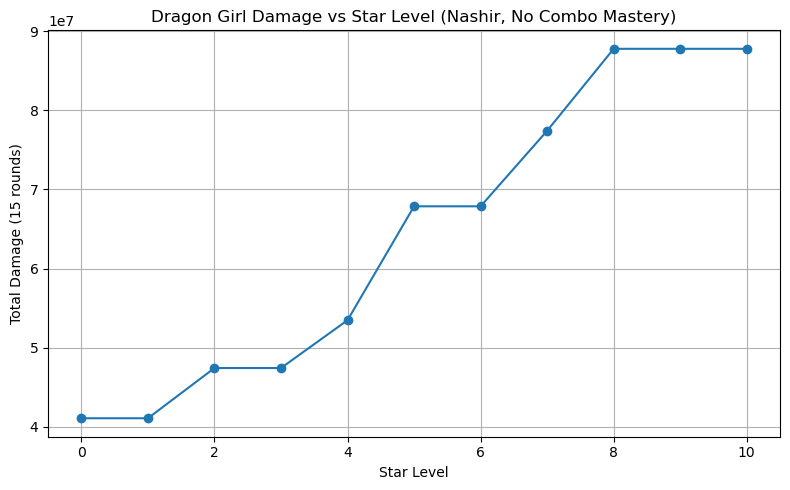

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df["star"], df["total"], marker="o")
plt.title("Dragon Girl Damage vs Star Level (Nashir, No Combo Mastery)")
plt.xlabel("Star Level")
plt.ylabel("Total Damage (15 rounds)")
plt.grid(True)
plt.tight_layout()
plt.show()


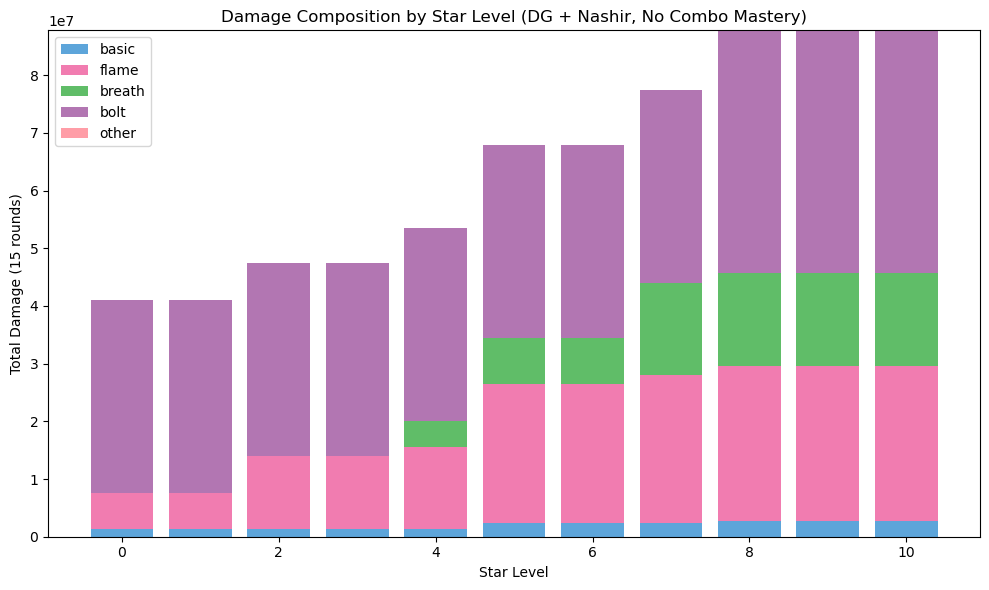

In [6]:
plt.figure(figsize=(10, 6))

bottom = None
components = ["basic", "flame", "breath", "bolt", "other"]
colors = ["#5DA5DA", "#F17CB0", "#60BD68", "#B276B2", "#FF9DA7"]

for comp, color in zip(components, colors):
    if bottom is None:
        plt.bar(df["star"], df[comp], label=comp, color=color)
        bottom = df[comp].copy()
    else:
        plt.bar(df["star"], df[comp], bottom=bottom, label=comp, color=color)
        bottom += df[comp]

plt.title("Damage Composition by Star Level (DG + Nashir, No Combo Mastery)")
plt.xlabel("Star Level")
plt.ylabel("Total Damage (15 rounds)")
plt.legend()
plt.tight_layout()
plt.show()
